## 前言
本系列文章是学习《机器学习实战》一书的读书笔记，并非按原文照抄，而是在理解原书的基础上融入了本人个人理解。同时，原书代码是基于Python2实现的，而本系列文章所有代码是用Python3实现的，因此代码与原书也会稍有不同。如果你使用本系列文章的代码，请一定在Python3下运行，否则你会遇到意想不到的问题。

此文是《机器学习实战》的读书笔记的第一篇，介绍该书中讲解的第一个机器学习算法：k-邻近算法，也称kNN（k-NearestNeighbor的缩写）算法。

## 算法原理
将输入数据的每个特征数据与训练样本集对应的特征数据进行比较，从而提取出样本集中特征最相似（即最邻近）的k个数据，将这k个数据中比例最高的分类标签作为输入数据的分类标签。
由于每个训练样本数据都是有标签的，所以kNN算法是监督学习的一种算法。

### 举例说明
假设有一组电影分类的样本数据集，根据电影中打斗镜头数和接吻镜头数的不同，被区分为动作片和爱情片。

有如下7部电影样本数据，其中6部已知类型，1部未知类型。我们希望从这6部电影中找到某种规律，从而预测未知类型的“电影7”属于什么类型。

| 电影名称 | 打斗镜头数 | 接吻镜头数 | 电影类型 | 
| -------- | --------: | -------: | -------- |
| 电影1    | 3         | 104      | 爱情片    |
| 电影2    | 2         | 100      | 爱情片    |
| 电影3    | 1         | 81       | 爱情片    |
| 电影4    | 101       | 10       | 动作片    |
| 电影5    | 99        | 5        | 动作片    |
| 电影6    | 98        | 2        | 动作片    |
| 电影7    | 18        | 90       | ？        |

将上面样本数据在图中表示出来：
```Python
import numpy as np
import matplotlib.pyplot as plt
x=np.array([3,2,1,101,99,98,18])
y=np.array([104,100,81,10,5,2,90])

colors = (['black','black','black','black','black','black','red'])
plt.scatter(x, y, c=colors)

plt.xlabel('打斗镜头数')
plt.ylabel("接吻镜头数")
plt.rcParams['font.sans-serif'] = ['FangSong']
plt.rcParams['axes.unicode_minus'] = False
plt.show()
```
![](http://wx2.sinaimg.cn/mw690/bd7db87egy1fsvwj6chebj20hs0d50st.jpg)

图中6个黑色的点表示上面样本数据集中的6部已知类型的电影，其中3部爱情片，3部动作片。红色的点表示我们将要预测的未知类型的“电影7”。

根据kNN算法原理，我们需要首先计算出图中红色点与所有黑色点的距离。大家都还记得计算两个点之间的距离公式吧。
如果点1记为（x1，y1），点2记为（x2，y2），那么点1与点2的距离为：
$$\sqrt{(x1-x2)^{2} + (y1-y2)^{2}}$$

通过距离公式计算得到所有6个黑色点到红色点的距离如下表：

| 电影名称 | 与电影7的距离计算公式                 | 与电影7的距离 |
| -------- | ----------------------------------- | -----------: |
| 电影1    | $\sqrt{(3-18)^{2} + (104-90)^{2}}$  | 20.5         |
| 电影2    | $\sqrt{(2-18)^{2} + (100-90)^{2}}$  | 18.7         |         
| 电影3    | $\sqrt{(1-18)^{2} + (81-90)^{2}}$   | 19.2         |         
| 电影4    | $\sqrt{(101-18)^{2} + (10-90)^{2}}$ | 115.3        | 
| 电影5    | $\sqrt{(99-18)^{2} + (5-90)^{2}}$   | 117.4        |
| 电影6    | $\sqrt{(98-18)^{2} + (2-90)^{2}}$   | 118.9        |

按照距离递增排序，可以找到k个距离最近的电影。
假设k=3，那么距离最近的3部电影是“电影2”，“电影3”和“电影1”。从输入数据集中知道，这三部电影都是爱情片，因此我们判定“电影7”是爱情片。

注意，kNN算法是按照距离最近的k个数据的类型来决定未知数据类型的。如果k个距离最近的数据不是唯一类型，将把k个数据中比例最高的类型作为未知数据的类型。
例如，如果我们把k设为4，得到距离最近的4部电影分别是“电影2”，“电影3”，“电影1”和“电影4”。这4部电影中，其中有三部爱情片，比例是75%，只有一部是动作片，比例是25%。因此我们判定未知电影还是爱情片。

## 算法实现
根据前面的算法原理以及例子，我们将k-邻近算法用Python实现。实现代码中主要进行以下操作：

1. 计算已知类别数据集中每个点与未知点的距离

2. 按照距离递增排序

3. 选取与未知点距离最小的k个点

4. 确定前k个点中所有类别的比例，

5. 返回前k个点比例最高的类别，作为未知点的预测分类。

### Python3代码实现
创建knn.py文件并输入如下代码：
```Python
from numpy import *
import operator
import sys

def classifier(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

def createDataSet():
    dataSet = array([[3,104],[2,100],[1,81],[101,10],[99,5],[98,2]])
    labels = ['爱情片', '爱情片', '爱情片', '动作片', '动作片', '动作片']
    return dataSet, labels

if __name__ == '__main__':
    dataSet, labels = createDataSet()
    input = [int(sys.argv[1]), int(sys.argv[2])]
    k = 4
    output = classifier(input, dataSet, labels, k)
    print(output)

```
### 运行代码
在命令行当前目录下执行上面python脚本，并将未知电影的打斗镜头数和接吻镜头数作为参数传递给脚本，结果将输出如下：
```Bash
C:\tmp> knn.py 18 90
爱情片
```
可见，上面的代码输出未知电影为“爱情片”，结果与我们之前推导的结果完全一致。

现在我们可以用这个程序来预测任意的输入数据了，例如：
```Bash
C:\tmp> knn.py 10 100
爱情片

C:\tmp> knn.py 90 10
动作片
```

### 代码解析

程序首先导入依赖模块，本算法将用到最重要的numpy，以及operator和sys模块，因此将他们导入。

In [2]:
from numpy import *
import operator
import sys

上面的核心代码在分类器函数classifier()中，有4个输入参数，分别为：

* inX: 输入数据，将要预测的数据，用数组表示，如[18, 90]
* dataSet: 训练数据集，即已知类型的数据，用numpy的矩阵表示
* labels: 训练数据集的分类，用数组表示，数组中每一个值表示dataSet中对应的数据的分类。
* k：k-邻近算法的k值

classifier()函数第一行获取dataSet数据集的数据个数，使用了numpy数组的shape属性。dataSet是传入的参数，它是由createDataSet()函数创建的numpy数组（二维矩阵）:

In [3]:
dataSet = array([[3,104], [2,100], [1,81], [101,10], [99,5], [98,2]])
print(dataSet)

[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]


numpy的array()函数可以通过传入一个python标准的list来创建一个numpy数组，numpy数组可以是多维的，对于二维数组也可称为矩阵。而我们的输入数据集dataSet就是一个二维数组，即是一个6x2的矩阵，6表示总共有6个数据样本，2表示每个数据样本有2列，即2个特征（打斗镜头数和接吻镜头数）。所以我们的数据集dataSet是一个6行2列的矩阵：

dataSet.shape是numpy提供的，可以获取numpy数组的维数，因为dataSet是一个6行2列的矩阵，因此dataSet.shape输出如下：

In [4]:
dataSet.shape

(6, 2)

而classifier()函数第一行调用dataSet.shape[0]，表示返回第一维的大小：

In [5]:
dataSetSize = dataSet.shape[0]
print(dataSetSize)

6


classifier()函数第二行使用了numpy的tile()函数，该函数原型为numpy.tile(A,reps)，接收两个参数，表示把A根据reps重复输出。请参见[numpy.tile](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.tile.html)对该函数的详细介绍。

classifier()函数中先按如下调用tile()函数：
```Python
tile(inX, (dataSetSize, 1))
```
第一个参数是由命令行输入的参数构成的Python标准list:
```Python
input = [int(sys.argv[1]), int(sys.argv[2])]
```

假如输入18, 90，则input为：

In [6]:
inX = [18, 91]
print(inX)

[18, 91]


我们先看看tile(inX, (dataSetSize, 1))输出长什么样子：

In [7]:
tmpMat = tile(inX, (dataSetSize, 1))
print(tmpMat)

[[18 91]
 [18 91]
 [18 91]
 [18 91]
 [18 91]
 [18 91]]


可以看到，tile()函数将输入的list在行方向上重复了6次，列方向上1次，从而变成了一个6行2列的矩阵。

接下来，用新构造的矩阵与数据集dataSet做减法。矩阵的减法大家都还记得吧，就是对应位置的数值做减法，因此得到相减之后的矩阵diffMat如下。

In [9]:
diffMat = tmpMat - dataSet
print(diffMat)

[[ 15 -13]
 [ 16  -9]
 [ 17  10]
 [-83  81]
 [-81  86]
 [-80  89]]


由于矩阵减法要求两个矩阵具有相同维数，因此我们也可以理解为什么需要先用tile()函数构造一个与dataSet相同维数的矩阵了吧。

接下来，对diffMat做平方运算，也就是对diffMat矩阵的每一个数做平方运算，得到sqDiffMat如下：

In [10]:
sqDiffMat = diffMat**2
print(sqDiffMat)

[[ 225  169]
 [ 256   81]
 [ 289  100]
 [6889 6561]
 [6561 7396]
 [6400 7921]]


接下来，对sqDiffMat矩阵求和。这里使用了numpy的sum()函数，请参见[numpy.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)对该函数的详细介绍。

sum()函数的axis参数指定对哪一维数据求和，如果不指定axis，将对整个矩阵所有数据求和。axis=0表示对矩阵的第一维数据求和，对于上面的二维矩阵，就是对每一列求和。axis=1表示将矩阵的第二维数据求和，对于上面的二维矩阵，也就是对每一行求和，比如第一行的两个数相加得到第一个值，225 + 169 = 394，以此类推对所有行求和，最后得到一个数组如下：

In [13]:
sqDistances = sqDiffMat.sum(axis=1)
print(sqDistances)

[  394   337   389 13450 13957 14321]


接下来对求和后的数组sqDistances求平方根，得到所有点与未知点的距离：

In [14]:
distances = sqDistances**0.5
print(distances)

[ 19.84943324  18.35755975  19.72308292 115.97413505 118.13974776
 119.67038063]


至此，我们已经求出了数据集dataSet中所有数据与输入数据之间的距离，distances数组中的每一个数就是dataSet中每一组数据与输入数据的距离。

可以看到，我们使用numpy的数组操作，代码非常简单，一次性可以求出所有数据到输入数据的距离，而不用通过遍历来求每个数据到输入数据的距离。

接下来，对上面求出来的距离进行排序。首先使用numpy的argsort()函数对distances排序，这个函数返回数组数值从小到大的索引值：

In [15]:
sortedDistIndicies = distances.argsort()
print(sortedDistIndicies)

[1 2 0 3 4 5]


从上面输出可以看出，索引为1（也就是数组的第2个，因为索引是从0开始的，）的数值最小，排在第一位，我们回头去看看distances数组，确实是数组的第2个数最小，为18.35755975。索引为2（数组的第3个数）的数值倒数第二小，排在第二位，数值为19.72308292。以此类推，可以得到上面相同的输出，从而也证明了argsort()函数的正确性。

接下来，程序通过for循环来找出距离最近的前k个数的类别，并统计每种类别的个数。

本程序中，k被设置为固定值4，所以程序只需要循环4次对前面已经排好序的数组进行统计。而labels是createDataSet()函数设置的，对应着dataSet中每组数组的类型。

In [18]:
k = 4
labels = ['爱情片', '爱情片', '爱情片', '动作片', '动作片', '动作片']

程序定义了一个集合classCount用于存放统计结果。每次循环先获取当前的类型，再对这个类型进行累加，最后将统计结果保存到集合classCount中。

In [19]:
classCount = {}
for i in range(k):
    voteIlabel = labels[sortedDistIndicies[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

我们打印classCount将得到如下输出：

In [21]:
print(classCount)

{'爱情片': 3, '动作片': 1}


从输出可以看出，经过统计后，前k（也就是4）个距离最近的数据中，类型为动作片的个数为1，类型为爱情片的个数为3。

最后，程序对classCount集合进行排序，按照集合value值从高到低排序，得到一个排好序的tuple列表。这里用到了Python内置的sorted函数。请参见[Python 内置函数sorted()在高级用法](https://www.cnblogs.com/brad1994/p/6697196.html)

In [22]:
sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
print(sortedClassCount)

[('爱情片', 3), ('动作片', 1)]


最后我们只需要返回排好序的tuple列表的第一个，则得到tuple('爱情片',3)，再返回这个tuple的第一个，则得到程序预测的结果类型。

In [23]:
type = sortedClassCount[0][0]
print(type)

爱情片


## kNN算法示例一：使用k-邻近算法提高约会网站配对成功率

### 案例说明

这个例子是海伦想通过在线约会网站寻找适合自己的约会对象，她认为有三种类型的约会对象：
* 不喜欢的人
* 魅力一般的人 （也就是可能是她喜欢的人）
* 极具魅力的人 （也就是她喜欢的人）

她想通过自己收集的数据对所有人进行归类，找到适合自己的约会对象。她收集的数据包含3个特征：
* 每年获得的飞行常客里程数 （我觉得这个可能说明这个人经常出去旅行，海伦喜欢旅行）
* 玩视频游戏所耗时间百分比 （海伦喜欢自由时间多的人，这样就有时间陪她约会，哪怕是视频？脑补一下！）
* 每周消费的冰淇淋公升数 （这个... 说明海伦想找个吃货...只能说明她自己也是个吃货吧！）

海伦收集的数据存储在一个文本文件中，每一行是是一个样本，每个样本前三个数据是3个特征值，最后一个数据是海伦对其进行的分类。
* largeDoses: 极具魅力
* smallDoses：魅力一般
* didntLike：不喜欢

示例数据如下：
```
40920	8.326976	0.953952	largeDoses
14488	7.153469	1.673904	smallDoses
26052	1.441871	0.805124	didntLike
75136	13.147394	0.428964	didntLike
38344	1.669788	0.134296	didntLike
72993	10.141740	1.032955	didntLike
35948	6.830792	1.213192	largeDoses
42666	13.276369	0.543880	largeDoses
67497	8.631577	0.749278	didntLike
...
```
海伦总共收集了1000个样本，你可以从这里[下载数据文件](https://github.com/longyg/Machine-Learning-Practice/blob/master/kNN/Halen%20date/datingTestSet.txt)

### 解析数据
有了数据文件后，我们需要解析该文件，将其解析为分类器函数可以接收的格式。还记得我们的分类器函数classifier()接收什么样的输入数据格式吧？包含两个参数：
1. 特征矩阵：dataSet
2. 分类标签列表(也可认为是向量)：labels

为了从数据文件中提取出这两个输入参数，我们实现以下函数file2matrix(),以文件名为参数：

In [26]:
from numpy import *
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0: 3]
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector

将数据文件放到该程序代码同一个目录下，名为：datingTestSet.txt，然后调用该函数看看解析结果：

In [27]:
filename = 'datingTestSet.txt'
dataSet, labels = file2matrix(filename)

In [28]:
print(dataSet)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]


In [29]:
print(labels)

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 3, 1, 3, 2, 3, 1, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 1, 2, 3, 1, 1, 1, 3, 1, 3, 2, 2, 1, 3, 1, 3, 2, 2, 1, 2, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 3, 2, 3, 1, 3, 1, 3, 3, 1, 3, 2, 1, 3, 

现在我们已经成功解析了输入数据文件，接下来我们可以对这些数据进行一些初步分析。

### 分析数据

在机器学习中，要对大规模的数据集进行分析，我们一般采用图形化的方式来展示数据，这样会比较直观，通过图形可以方便的找出一些数据模式（即规律）。

下面我们将前面的数据集图形化，实现以下函数showDataSet()，将file2matrix()函数返回的两个结果作为参数：

In [31]:
import matplotlib
import matplotlib.pyplot as plt

def showDataSet(dataSet):
    fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(15,10))  
    
    axs[0][0].scatter(dataSet[:, 0], dataSet[:, 1], 15.0*array(labels), 15.0*array(labels))
    axs[0][0].set_title('每年获得的飞行常客里程数与玩视频游戏所消耗时间百分比')
    axs[0][0].set_xlabel('每年获得的飞行常客里程数')
    axs[0][0].set_ylabel('玩视频游戏所消耗时间百分比')
    
    axs[0][1].scatter(dataSet[:, 0], dataSet[:, 2], 15.0*array(labels), 15.0*array(labels))
    axs[0][1].set_title('每年获得的飞行常客里程数与每周消费的冰激淋公升数')
    axs[0][1].set_xlabel('每年获得的飞行常客里程数')
    axs[0][1].set_ylabel('每周消费的冰激淋公升数')
    
    axs[1][0].scatter(dataSet[:, 1], dataSet[:, 2], 15.0*array(labels), 15.0*array(labels))
    axs[1][0].set_title('玩视频游戏所消耗时间百分比与每周消费的冰激淋公升数')
    axs[1][0].set_xlabel('玩视频游戏所消耗时间百分比')
    axs[1][0].set_ylabel('每周消费的冰激淋公升数')
    
    plt.rcParams['font.sans-serif'] = ['FangSong']
    plt.rcParams['axes.unicode_minus'] = False
    plt.show()

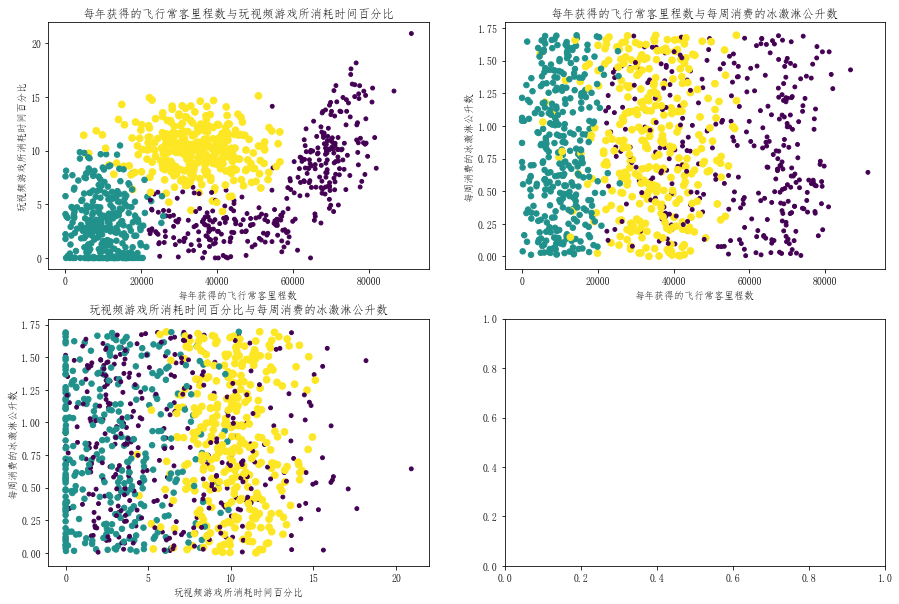

In [32]:
showDataSet(dataSet)

我们可以从上面的图中看出一些规律。上面三个图分别取了三个特征中的两个进行绘制，这样更容易从二维图形中区分数据的类别。大概可以猜测一下，海伦喜欢的人，每年至少有一定的飞行记录，不能太少也不能太多，太少说明很少出去旅行，太多说明有可能是因公常年外出。不过这纯属我个人猜测，大家可以自行脑补！

### 预处理数据

前面我们的电影分类例子中，特征是二维的，计算距离使用的是二维平面中两点之间的距离公式。但是这里海伦收集的数据是三维的，那么我们如何计算样本之间的距离呢？

实际上，我们可以扩展前面的二维平面两点距离公式到任意维度，采用欧几里得距离公式：

假设一个n维空间的两个点表示为：

* 点1: (x1, x2, x3, ...xn)
* 点2: (y1, y2, y3, ...yn)

那么点1与点2的距离为：

$$\sqrt{(x1-y1)^{2} + (x2-y2)^{2} + (x3-y3)^{2} + ... + (xn-yn)^{2}}$$

因此我们将上面公式应用于海伦收集的数据，例如我们可以计算数据文件中前两个样本之间的距离，样本数据为：
```
40920    8.326976    0.953952    largeDoses
14488    7.153469    1.673904    smallDoses
```
应用上面的公式为：

$$\sqrt{(40920-14488)^{2} + (8.326976-7.153469)^{2} + (0.953952-1.673904)^{2}}$$

从上面公式可以发现，方程中数字差值最大的属性对计算结果影响最大。因为每年飞行里程数的数值一般情况下都是几百上千，甚至上万，而另外两个特征的数值一般情况下都很小。也就是说，每年飞行里程数对于计算结果的影响远远大于另外两个特征。

如果我们直接使用这样的样本数据计算，会导致结果几乎由三个特征中的一个（也就是每年飞行里程数）决定了，而另外两个特征几乎不会影响计算结果。

这明显是不可接受的，因为海伦认为这三个特征是同等重要的，因此这个特征应该具有相同权重。

对于这种情况，我们需要对样本数据进行预处理，通常采用的方法是将数值进行归一化，比如将每个特征的取值范围处理为0到1或者-1到1之间。

下面的公式可以将任意取值范围的数值转化为0到1区间内的值：

```
newValue = (oldValue - min) / (max - min)
```

其中min和max分别是数据集中的最小特征值和最大特征值，oldValue是数据集中原始特征值，newValue是进行归一化处理后的结果值，我们将使用这个预处理之后的数值进行分类计算。

现在我们定义一个autoNorm()函数来实现上面的归一化公式:

In [33]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet / tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [34]:
ormDataSet, ranges, minVals = autoNorm(dataSet)

In [35]:
print(ormDataSet)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


In [36]:
print(ranges)

[9.1273000e+04 2.0919349e+01 1.6943610e+00]


In [37]:
print(minVals)

[0.       0.       0.001156]


autoNorm()函数中,首先使用numpy矩阵的min()和max()函数得到每个特征的最小和最大值，分别放在变量minVals和maxVals中。

dataSet.min(0)是从返回dataSet矩阵每一列的最小值，dataSet.max(0)返回矩阵每一列的最大值。

因为每一列的最小值和最大值只有1个，而我们有三个特征值也就是三列，所以minVals和maxVals变量存放的是1x3的矩阵：

In [39]:
minVals = dataSet.min(0)
print(minVals)

[0.       0.       0.001156]


In [40]:
maxVals = dataSet.max(0)
print(maxVals)

[9.1273000e+04 2.0919349e+01 1.6955170e+00]


同理，ranges也是1x3的，因为两个矩阵之差得到的是相同维度的矩阵：

In [42]:
ranges = maxVals - minVals
print(ranges)

[9.1273000e+04 2.0919349e+01 1.6943610e+00]


根据上面的归一化公式，我们需要用原始特征值减去最小值，然后除以每个特征的取值范围（即最大值减最小值）。由于我们的特征矩阵dataSet是一个1000x3的矩阵，因此我们需要将minVals和ranges重复变成同样大小的矩阵，这里我们依然使用了numpy的tile()函数来重复矩阵。我们需要首先得到dataSet的大小，通过矩阵的shape属性获取矩阵大小：

In [43]:
m = dataSet.shape[0]
print(m)

1000


然后重复最小特征矩阵minVals m次，注意是在行方向上重复m次，从而构造1000x3的矩阵：

In [46]:
tmpMat = tile(minVals, (m, 1))
print(tmpMat)

[[0.       0.       0.001156]
 [0.       0.       0.001156]
 [0.       0.       0.001156]
 ...
 [0.       0.       0.001156]
 [0.       0.       0.001156]
 [0.       0.       0.001156]]


接下来用原始特征值减去最小值：

In [47]:
normDataSet = dataSet - tile(minVals, (m, 1))
print(normDataSet)

[[4.0920000e+04 8.3269760e+00 9.5279600e-01]
 [1.4488000e+04 7.1534690e+00 1.6727480e+00]
 [2.6052000e+04 1.4418710e+00 8.0396800e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6547100e-01]
 [4.8111000e+04 9.1345280e+00 7.2688900e-01]
 [4.3757000e+04 7.8826010e+00 1.3312900e+00]]


然后重复ranges矩阵m次，并用上一步求出的原始特征值与最小值的差值除以取值范围：

In [48]:
normDataSet = normDataSet / tile(ranges, (m, 1))
print(normDataSet)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


我们已经完成了数据的预处理。对数据进行处理是机器学习中训练算法很关键的一步，因为数据的正确性直接影响算法的正确性。
### 测试分类器

现在，我们已经对原始数据进行了预处理，接下来，我们可以用这些数据来测试我们前面实现的kNN算法分类器了。

这里再一次将我们的分类器算法列出来，也就是我们前面详细讲解过的classifier()函数：

In [49]:
from numpy import *
import operator
import sys

def classifier(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

我们需要从数据集中选出一部分作为分类器训练数据，一部分作为测试数据，用于测试分类器的正确率。一般情况下，我们使用错误率来检测分类器的效果。错误率就是分类器给出错误结果的次数除以测试样本总数，完美分类器的错误率为0，而错误率为1的分类器根本不能给出任何正确的结果。因此我们希望我们的分类器的错误率越小越好。

现在我们定义一个datingClassTest()函数来计算分类器应用于海伦收集的约会数据集的错误率：

In [50]:
def datingClassTest():
    testRatio = 0.1
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * testRatio)
    trainDataMat = normMat[numTestVecs:m,:]
    trainLabels = datingLabels[numTestVecs:m]
    k = 3
    errorCount = 0.0
    for i in range(numTestVecs):
        testIdata = normMat[i, :]
        classResult = classifier(testIdata, trainDataMat, trainLabels, k)
        print("分类器预测结果是: ", classResult, " 实际结果是: ", datingLabels[i])
        if (classResult != datingLabels[i]):
            errorCount += 1.0
    print("总的错误率是: ", errorCount / float(numTestVecs))

In [51]:
datingClassTest()

分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  2  实际结果是:  2
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  2  实际结果是:  2
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  2  实际结果是:  2
分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  2  实际结果是:  2
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  3  实际结果是:  2
分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  2  实际结果是:  2
分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  2  实际结果是:  2
分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  2  实际结果是:  2
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  2  实际结果是:  2
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  2  实际结果是:  2
分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  3  实际结果是:  3
分类器预测结果是:  1  实际结果是:  1
分类器预测结果是:  2  实际

可以看到，分类器对于海伦收集的数据的分类错误率是5%，这个结果还不错。我们可以改变测试数据比例变量testRatio的值，可以发现错误率会随着变量值的变化而变化。

由于分类器的错误率还不错，那么我们现在可以输入任意未知约会对象的属性，由分类软件来帮助海伦判断对象是否是海伦喜欢的类型。

那么我们来设计一个分类软件，允许用户输入某个人的信息，程序返回预测结果：

In [52]:
def classifyPerson():
    resultList = ['你应该不喜欢他', '你可能会有一点喜欢他', '他应该是你喜欢的人']
    percentTats = float(input("玩视频游戏所消耗时间百分比？"))
    ffMiles = float(input("每年获得的飞行常客里程数？"))
    iceCream = float(input("每周消费的冰淇淋公升数？"))
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    preProcessInArr = (inArr - minVals) / ranges
    classifierResult = classifier(preProcessInArr, normMat, datingLabels, 3)
    print(">> 预测结果：", resultList[classifierResult - 1])

In [53]:
classifyPerson()

玩视频游戏所消耗时间百分比？30
每年获得的飞行常客里程数？1500
每周消费的冰淇淋公升数？2
>> 预测结果： 他应该是你喜欢的人


我们已经基于机器学习的kNN算法构建了一个完整的应用程序，它完全可以被应用于实际中，只是对于现实情况，可能不仅仅三个特征，可能会有很多特征属性来区分一个约会对象的类型。但是不管有多少特征，我们都可以采用同样的分类器来进行预测。